# **Data Exploration Study**

## Objectives

### Business Requirement 1:
The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

#### Covered in this Notebook:
1) Features and correlations related to: Missing Values
2) Features and correlations related to: Feature Types
3) Distribution of Continuous Numerical Features
4) Variable significance in a business context


## Inputs

outputs/datasets/collection/house_prices_records.csv

## Outputs

Implement the code that answers business requirement 1 and can be used to build the Streamlit App

## Additional Notes

The Target Variable is "SalePrice".

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/my-project-5/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/my-project-5'

# EDA: Import Tools

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all columns of the DataFrame
pd.pandas.set_option('display.max_columns',None)

# EDA: Load Data

In [5]:
dataset_raw_path = "outputs/datasets/collection/house_prices_records.csv"
dataset = pd.read_csv(dataset_raw_path)
print(dataset.shape)

(1460, 24)


In [6]:
dataset.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# EDA: Start

# Explore Features
## Of Type: All
### Target: Missing Values

In [7]:
features_with_missing_values=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_missing_values:
    print(feature, np.round(dataset[feature].isnull().mean(),4), ' % Percentage of Missing Values in entire Dataset')

2ndFlrSF 0.0589  % Percentage of Missing Values in entire Dataset
BedroomAbvGr 0.0678  % Percentage of Missing Values in entire Dataset
BsmtFinType1 0.0781  % Percentage of Missing Values in entire Dataset
EnclosedPorch 0.9068  % Percentage of Missing Values in entire Dataset
GarageFinish 0.111  % Percentage of Missing Values in entire Dataset
GarageYrBlt 0.0555  % Percentage of Missing Values in entire Dataset
LotFrontage 0.1774  % Percentage of Missing Values in entire Dataset
MasVnrArea 0.0055  % Percentage of Missing Values in entire Dataset
WoodDeckSF 0.8938  % Percentage of Missing Values in entire Dataset


## Explore Correlations
### Between: Missing Values & the Target Variable

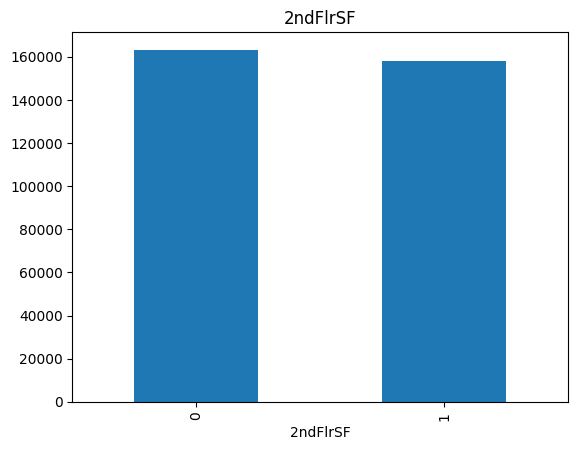

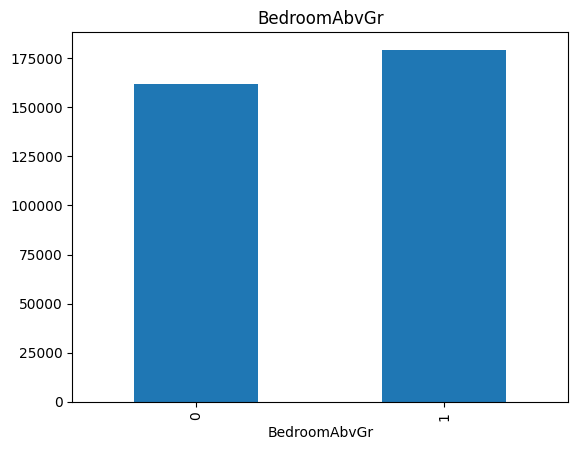

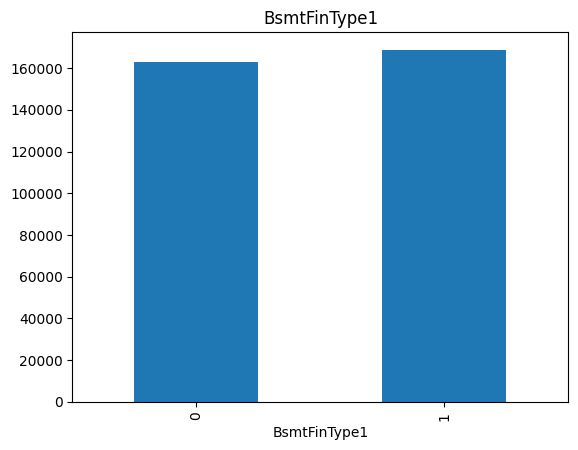

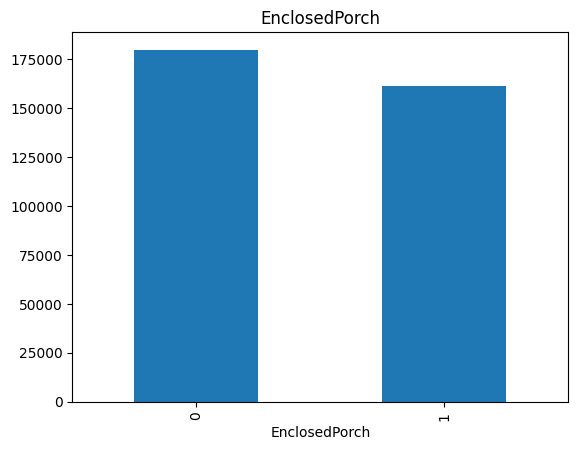

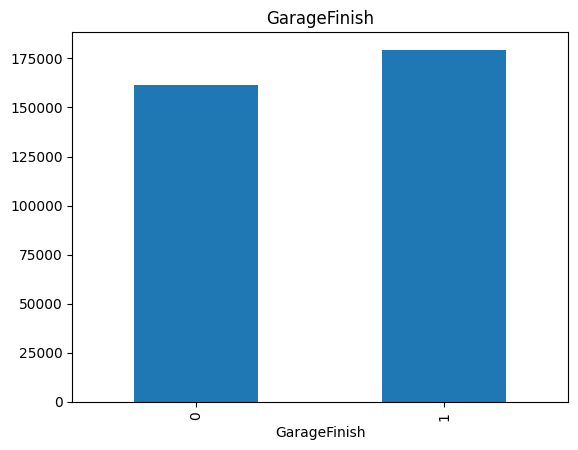

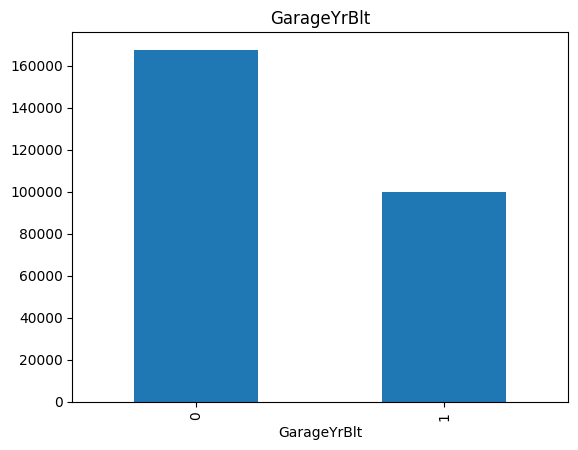

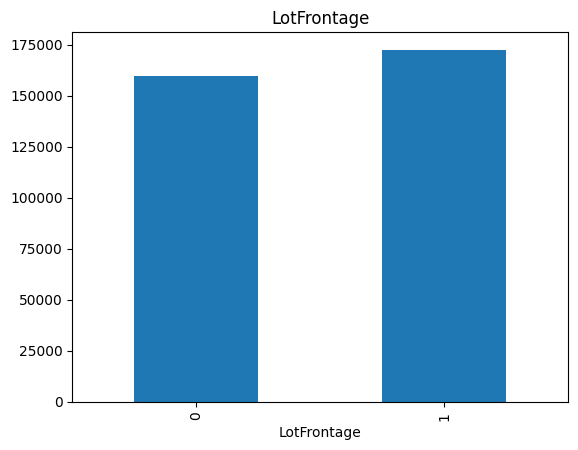

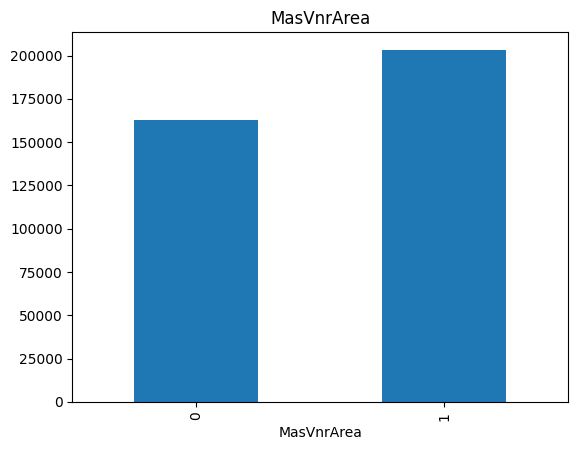

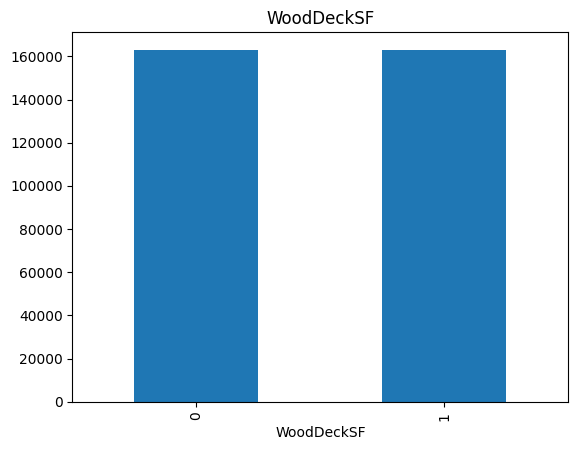

In [8]:
for feature in features_with_missing_values:
    data_mval = dataset.copy()
    
    # Replace missing values with 1
    # Features with NO missing values are assigned 0 
    data_mval[feature] = np.where(data_mval[feature].isnull(), 1, 0)
    
    data_mval.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### The missing values will be handled in the Feature Engineering section of the project.

# Explore Features
## Of Type: Numerical

In [9]:
# List
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Amount of Numerical Features: ', len(numerical_features))

# Visualize
dataset[numerical_features].head()

Amount of Numerical Features:  20


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,978,284,NaN,460,1976.0,1262,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,216,540,NaN,642,1998.0,1717,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,655,490,0.0,836,2000.0,2198,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Explore Features
## Of Type: Temporal

In [10]:
# List
year_feature_in_numerical_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature_in_numerical_features

['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

In [11]:
for feature in year_feature_in_numerical_features:
    print(feature, dataset[feature].unique())

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008

## Explore Correlations
### Between: Temporal Features & the Target Variable

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

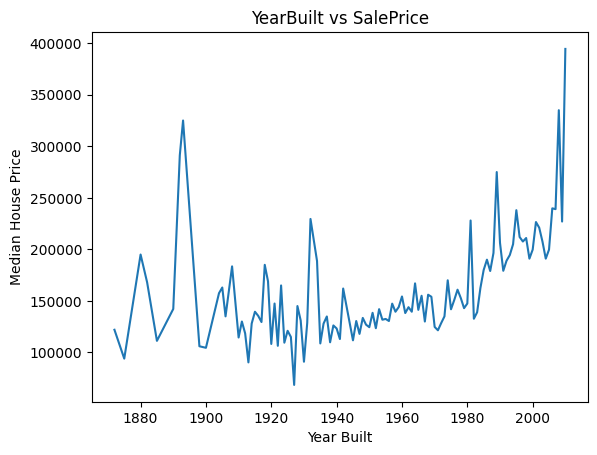

In [12]:
# Explore
dataset.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title("YearBuilt vs SalePrice")

### Visualize Correlations
Note: X-Axis represents the Amount Of Years Elapsed

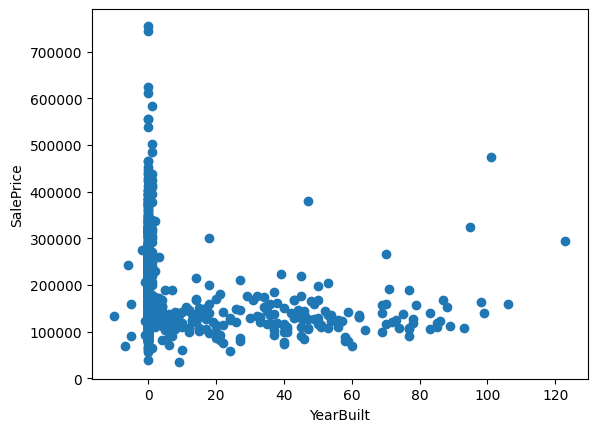

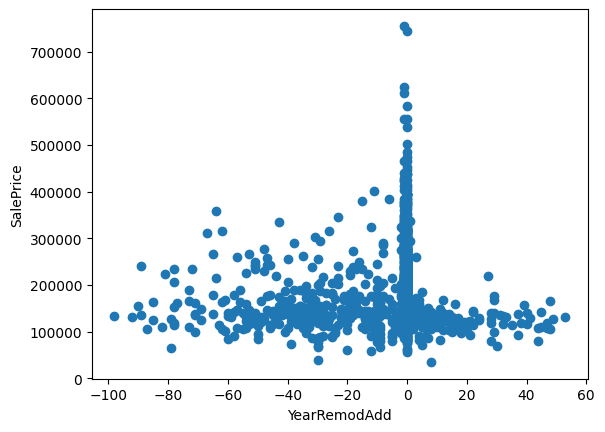

In [13]:
for feature in year_feature_in_numerical_features:
    if feature!='GarageYrBlt':
        # Implement a new "data"-variable
        data_of_year_features=dataset.copy()
        # Compare
        data_of_year_features[feature]=data_of_year_features['GarageYrBlt']-data_of_year_features[feature]

        plt.scatter(data_of_year_features[feature],data_of_year_features['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Explore Features
## Of Type: Numerical - Discrete

In [14]:
# Set "25" as the threshold for discrete variables
discrete_in_numerical_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature_in_numerical_features]

print("Amount of Discrete Features: {}".format(len(discrete_in_numerical_features)))

Amount of Discrete Features: 4


In [15]:
discrete_in_numerical_features

['BedroomAbvGr', 'EnclosedPorch', 'OverallCond', 'OverallQual']

In [16]:
dataset[discrete_in_numerical_features].head()

,BedroomAbvGr,EnclosedPorch,OverallCond,OverallQual
0,3.0,0.0,5,7
1,3.0,NaN,8,6
2,3.0,0.0,5,7
3,NaN,NaN,5,7
4,4.0,0.0,5,8


## Explore Correlations
### Between: Discrete Features & the Target Variable

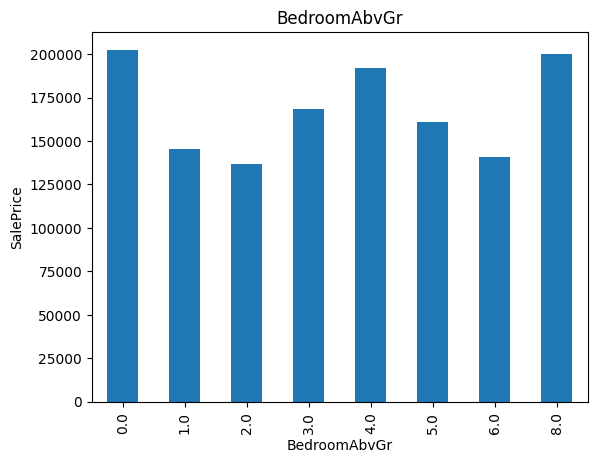

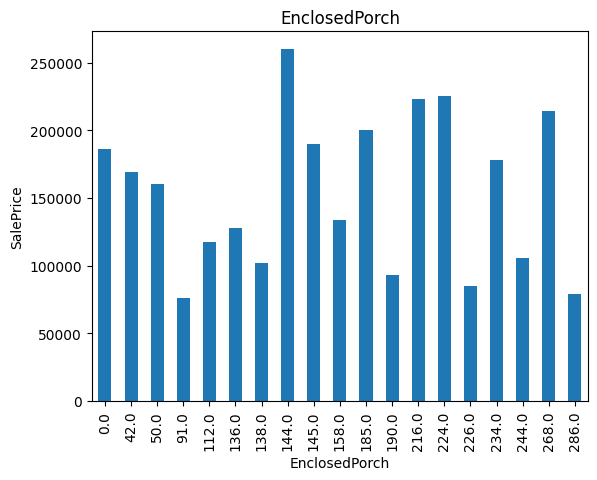

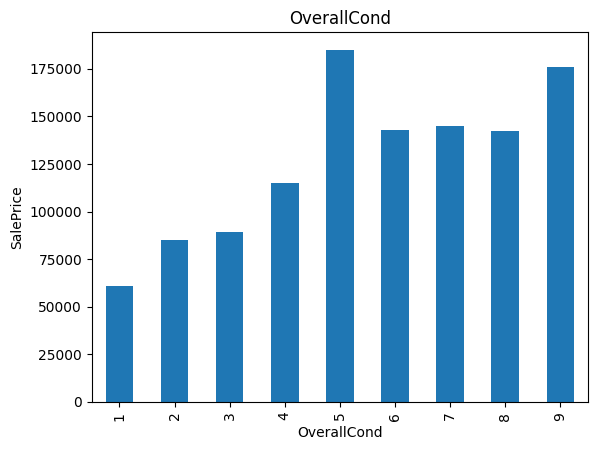

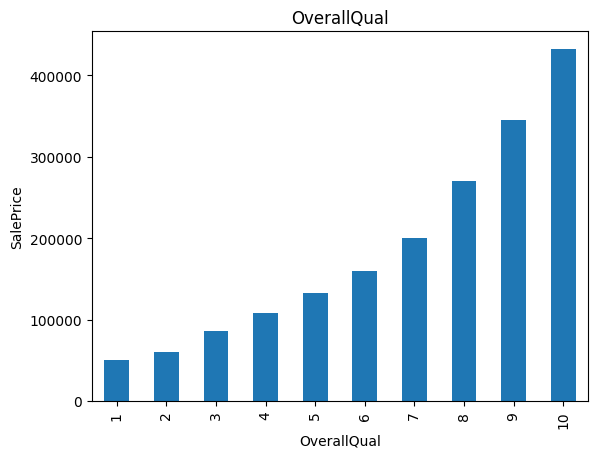

In [17]:
for feature in discrete_in_numerical_features:
    data_discrete=dataset.copy()
    data_discrete.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Conclusions & Observations
- Monotonic Relationship with Target Variable: OverallQual

## Explore Correlations 
### Between: Continuous Features & the Target Variable

In [18]:
# Implement Variable
cont_feature=[feature for feature in numerical_features if feature not in discrete_in_numerical_features+year_feature_in_numerical_features]
print("Amount of Continuous Features: {}".format(len(cont_feature)))

Amount of Continuous Features: 13


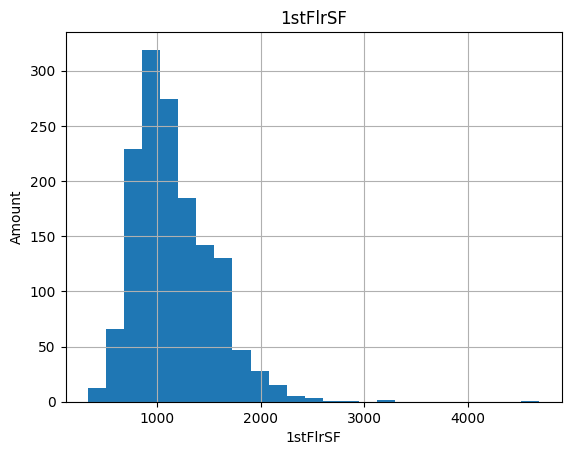

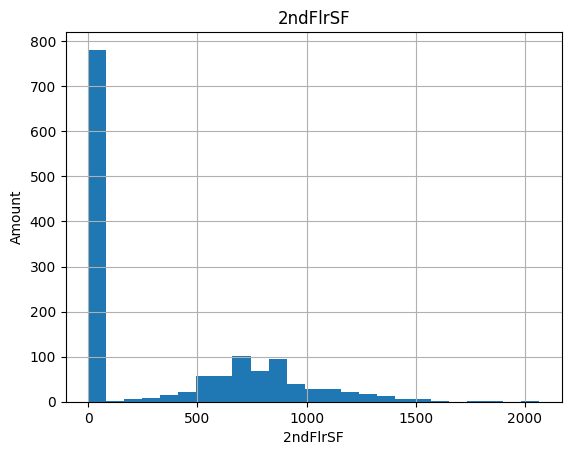

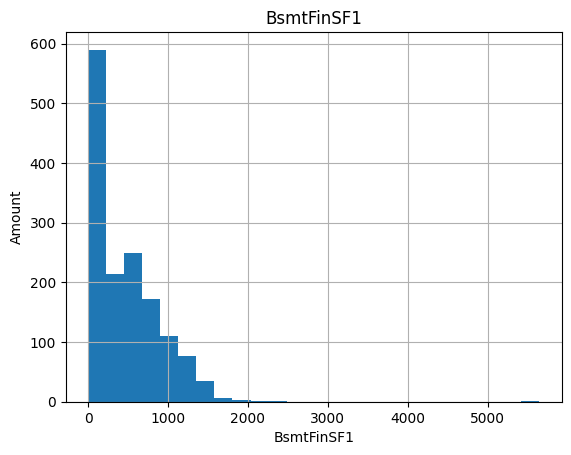

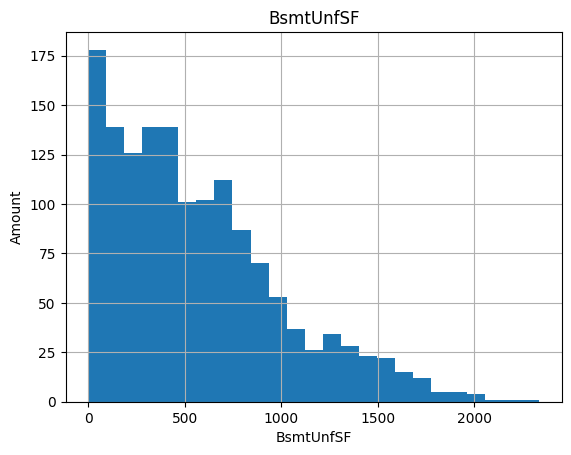

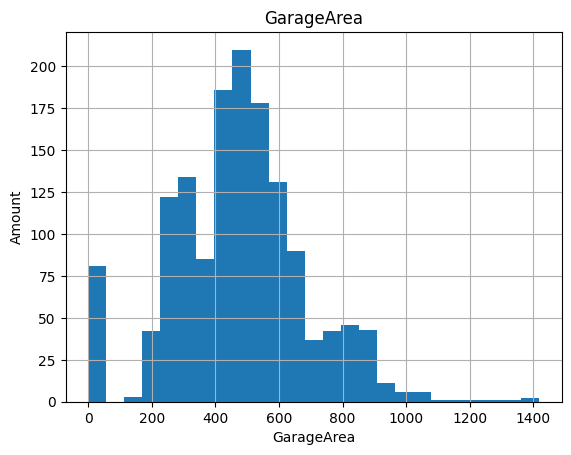

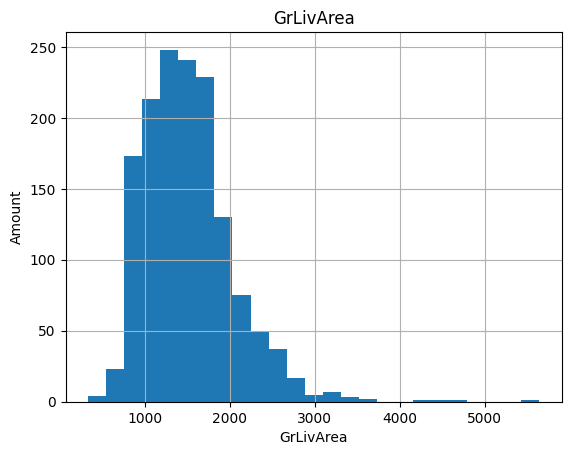

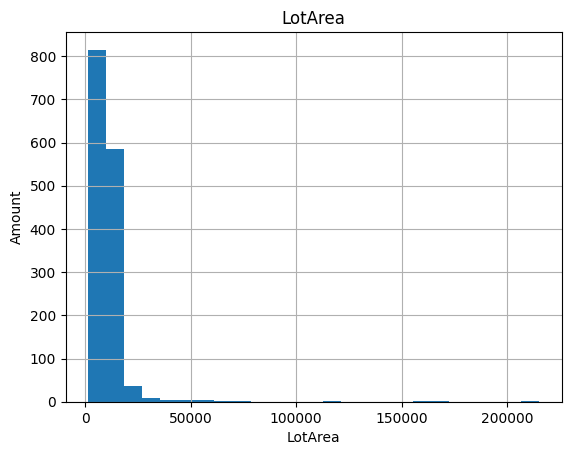

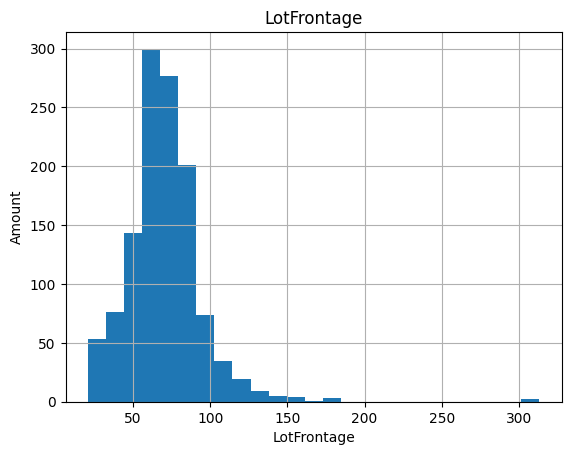

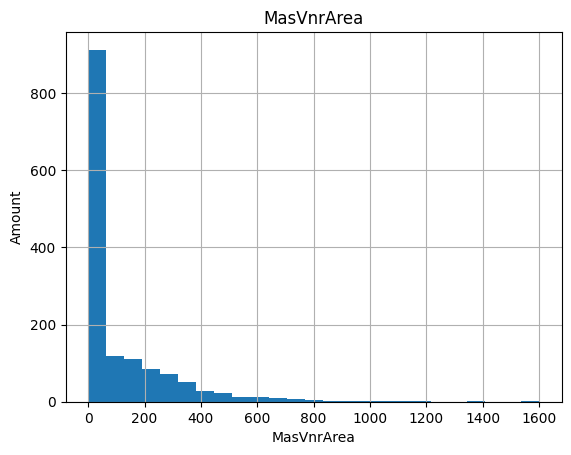

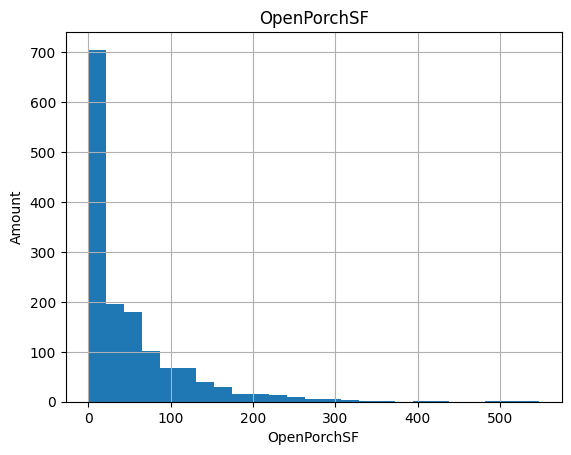

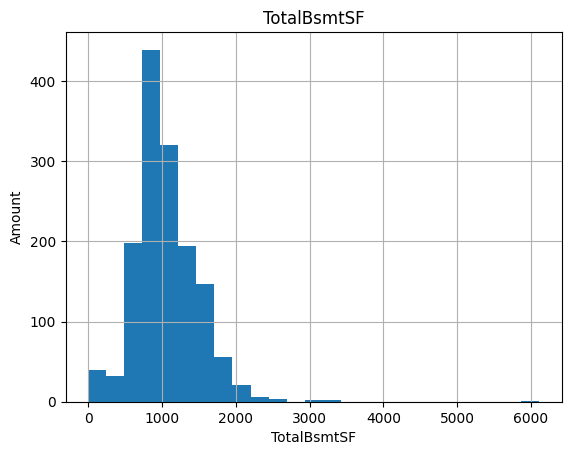

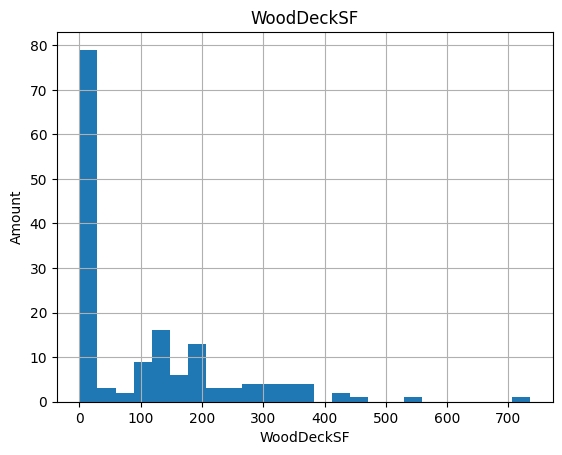

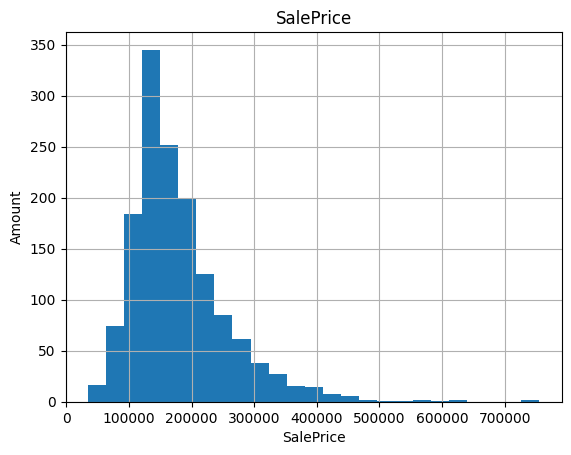

In [19]:
for feature in cont_feature:
    data_cont=dataset.copy()
    data_cont[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Amount")
    plt.title(feature)
    plt.show()

### Conclusions & Observations
- Non-Gaussian (Abnormal Distribution) patterns implies Skewness

# Explore Distribution
## Applied Technique: Logarithmic Transformation

- Is applied to Feature Type: Numerical - Continuous 
- Purpose: To handle skewness and normalize the distribution

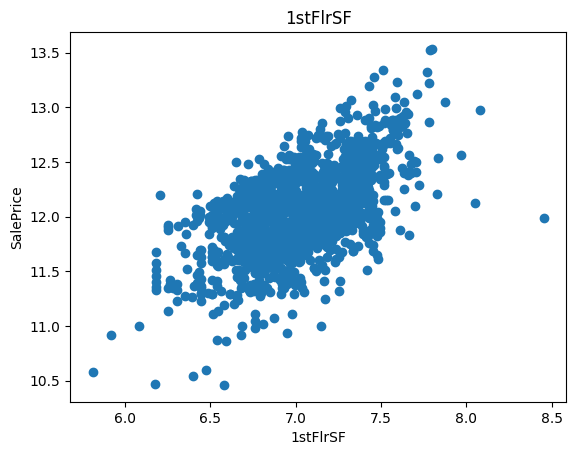

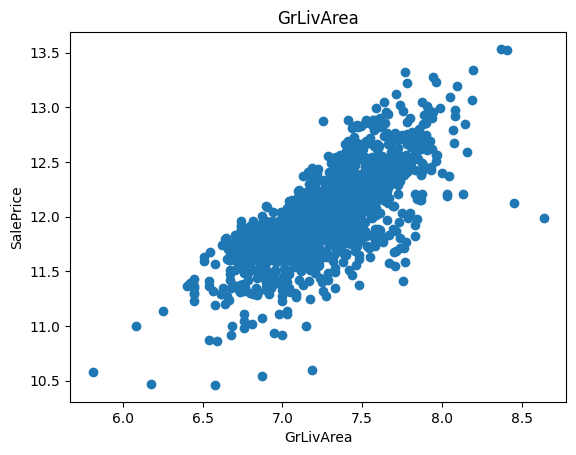

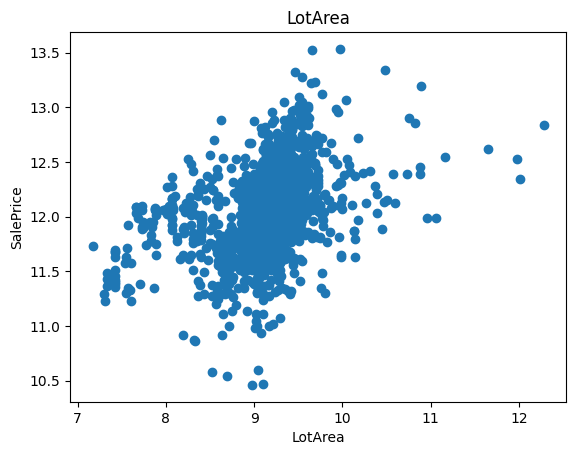

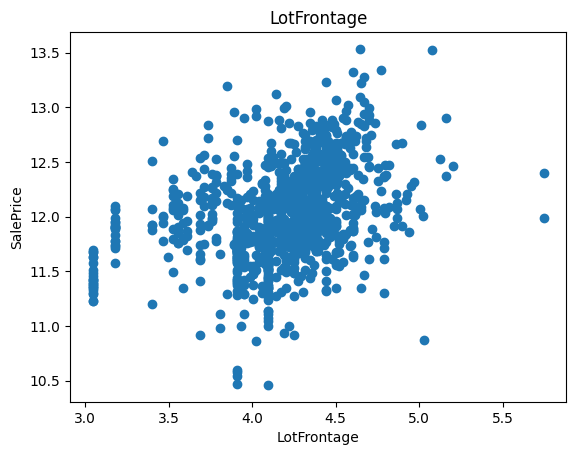

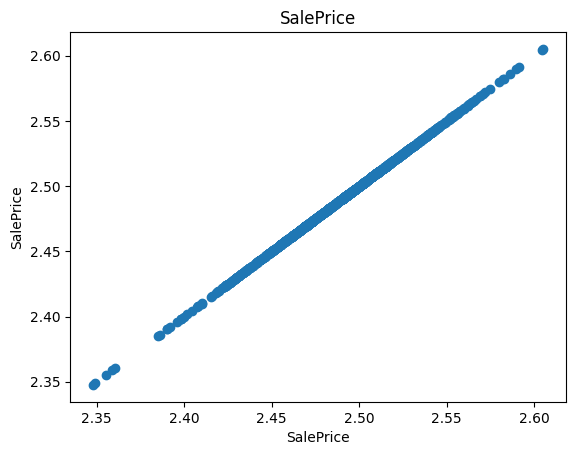

In [20]:
# Log-Normal Transformation
for feature in cont_feature:
    data_log_transform=dataset.copy()
    if 0 in data_log_transform[feature].unique():
        pass
    else:
        data_log_transform[feature]=np.log(data_log_transform[feature])
        data_log_transform['SalePrice']=np.log(data_log_transform['SalePrice'])
        plt.scatter(data_log_transform[feature], data_log_transform['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

## Explore Data Points
### Of Type: Outliers
#### With: Box Plot

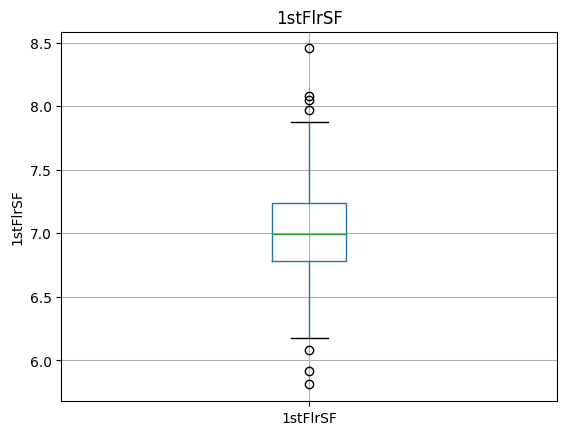

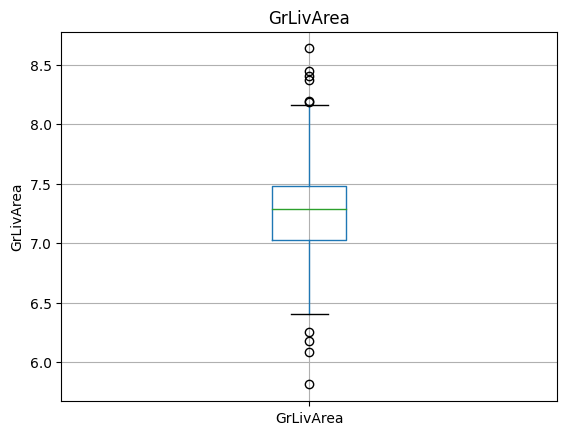

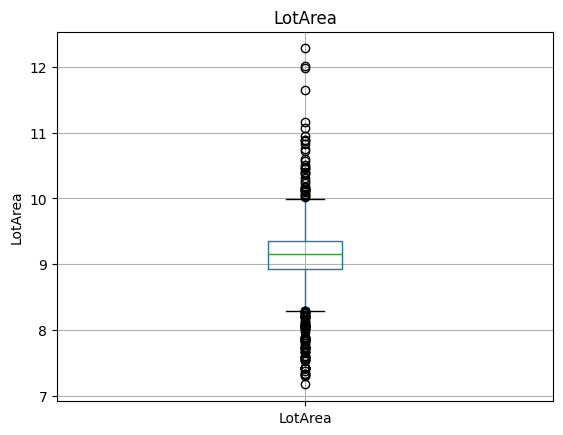

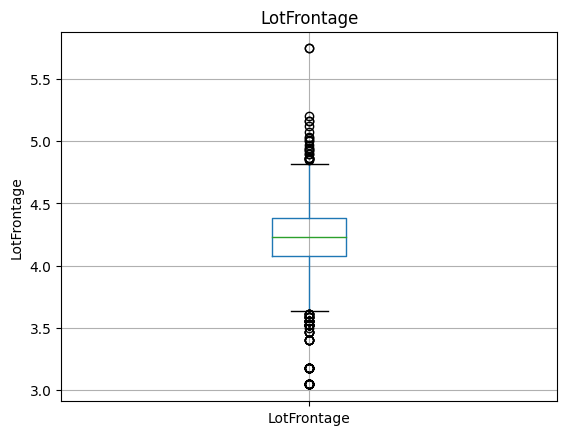

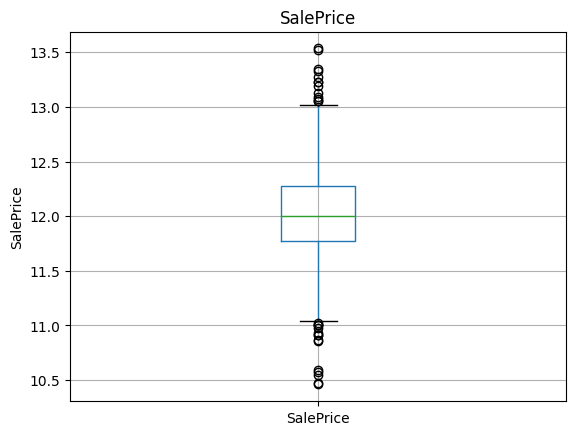

In [21]:
# Identify Outliers
for feature in cont_feature:
    data_of_outliers=dataset.copy()
    if 0 in data_of_outliers[feature].unique():
        pass
    else:
        data_of_outliers[feature]=np.log(data_of_outliers[feature])
        data_of_outliers.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Explore Features
## Of Type: Categorical

In [22]:
data_of_categorical=dataset.copy()

categorical_features=[feature for feature in dataset.columns if data_of_categorical[feature].dtypes=='O']
categorical_features

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

In [23]:
dataset[categorical_features].head()

,BsmtExposure,BsmtFinType1,GarageFinish,KitchenQual
0,No,GLQ,RFn,Gd
1,Gd,ALQ,RFn,TA
2,Mn,GLQ,RFn,Gd
3,No,ALQ,Unf,Gd
4,Av,GLQ,RFn,Gd


In [24]:
for feature in categorical_features:
    print(' {} has {}'.format(feature,dataset[feature].unique()))

 BsmtExposure has ['No' 'Gd' 'Mn' 'Av' 'None']
 BsmtFinType1 has ['GLQ' 'ALQ' 'Unf' 'Rec' nan 'BLQ' 'None' 'LwQ']
 GarageFinish has ['RFn' 'Unf' nan 'Fin' 'None']
 KitchenQual has ['Gd' 'TA' 'Ex' 'Fa']


In [25]:
# List all their labels/categories 
for feature in categorical_features:
    print(' {} has {} labels'.format(feature,len(dataset[feature].unique())))

 BsmtExposure has 5 labels
 BsmtFinType1 has 8 labels
 GarageFinish has 5 labels
 KitchenQual has 4 labels


## Explore Correlations
### Between: Categorical Features & the Target Variable

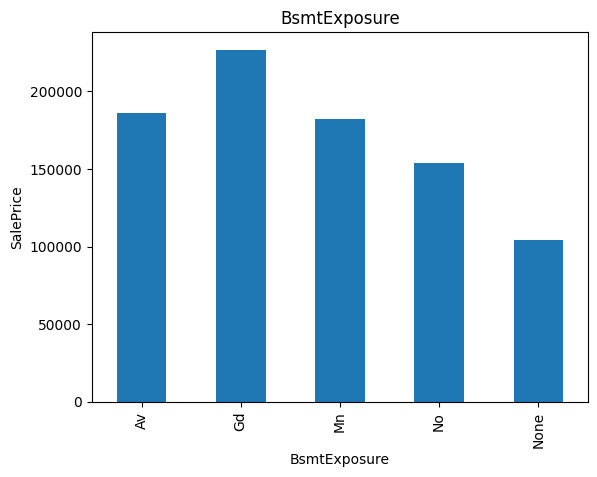

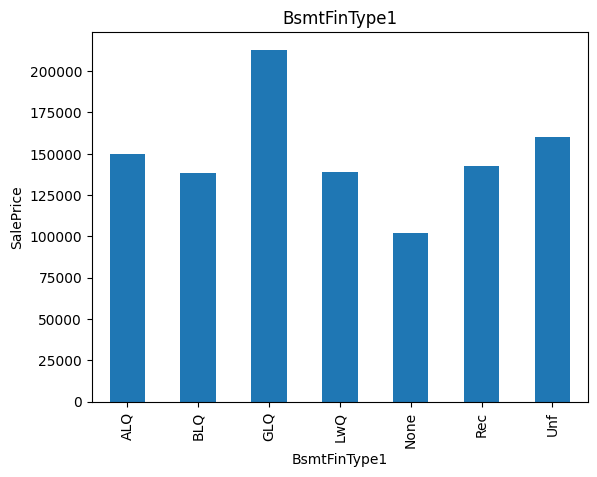

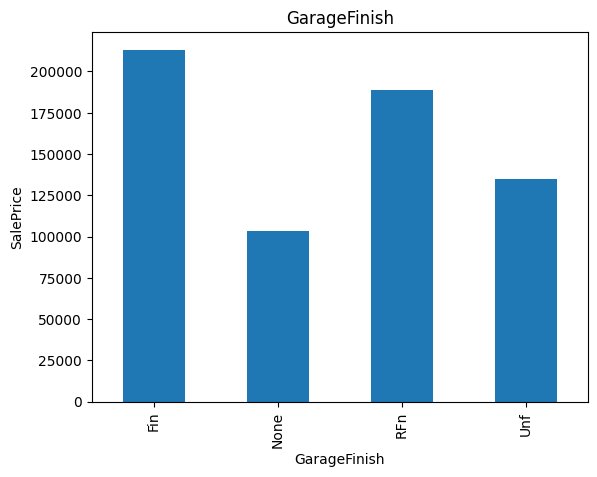

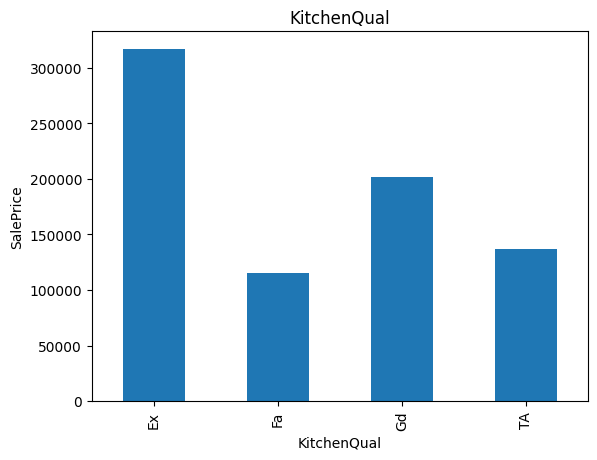

In [26]:
for feature in categorical_features:
    data_of_categorical=dataset.copy()
    data_of_categorical.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# EDA: Finish

In [28]:
import os
try:
    os.makedirs(name='outputs/datasets/collection')
except Exception as e:
    print(e)

# DF-1) Missing Values
data_mval.to_csv("outputs/datasets/collection/data_mval.csv", index=False)

# DF-2) Temporal Features
data_of_year_features.to_csv("outputs/datasets/collection/data_of_year_features.csv", index=False)

# DF-3) Discrete Numerical Features
data_discrete.to_csv("outputs/datasets/collection/data_discrete.csv", index=False)

# DF-4) Cont. Numerical Features
data_cont.to_csv("outputs/datasets/collection/data_cont.csv", index=False)

# DF-5) Applied Technique - Log. Transformation
data_log_transform.to_csv("outputs/datasets/collection/data_log_transform.csv", index=False)

# DF-6) Data Points - Outliers
data_of_outliers.to_csv("outputs/datasets/collection/data_of_outliers.csv", index=False)

# DF-7) Categorical Features
data_of_categorical.to_csv("outputs/datasets/collection/data_of_categorical.csv", index=False)

[Errno 17] File exists: 'outputs/datasets/collection'
